# Classification of mnist handwritten digits

# Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.models import Model
import random

In [ ]:
np.random.seed(0)  # random seed for reproducability

In [ ]:
(X_train,y_train),(X_test , y_test) = mnist.load_data() # loading the dataset

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# visulizing the dimension of the training and testing dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [ ]:
# to ensure number of images and labels are consistent
assert(X_train.shape[0]) == y_train.shape[0], "the number of images is not equal to the number of labels"
assert(X_test.shape[0]) == y_test.shape[0], "the number of images is not equal to the number of labels"
assert(X_train.shape[1:]) == (28,28) ,"the dimensions of the images are not 28x28"
assert(X_test.shape[1:]) == (28,28) ,"the dimensions of the images are not 28x28"

# Visualization of sample images

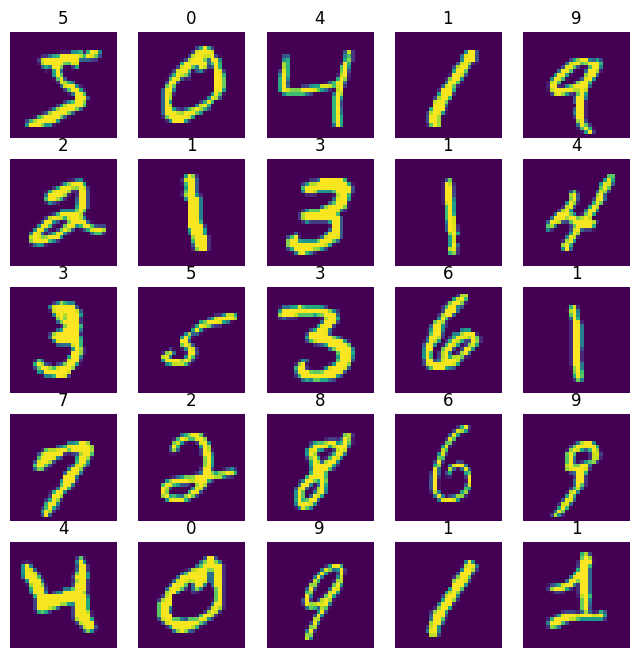

In [ ]:
# Displaying first 25 images of dataset
fig = plt.figure(figsize=(8,8))
nrows=5
ncols=5
for i in range(25):
  fig.add_subplot(nrows,ncols,i+1)
  plt.imshow(X_train[i])
  plt.title(y_train[i])
  plt.axis(False)
plt.show()

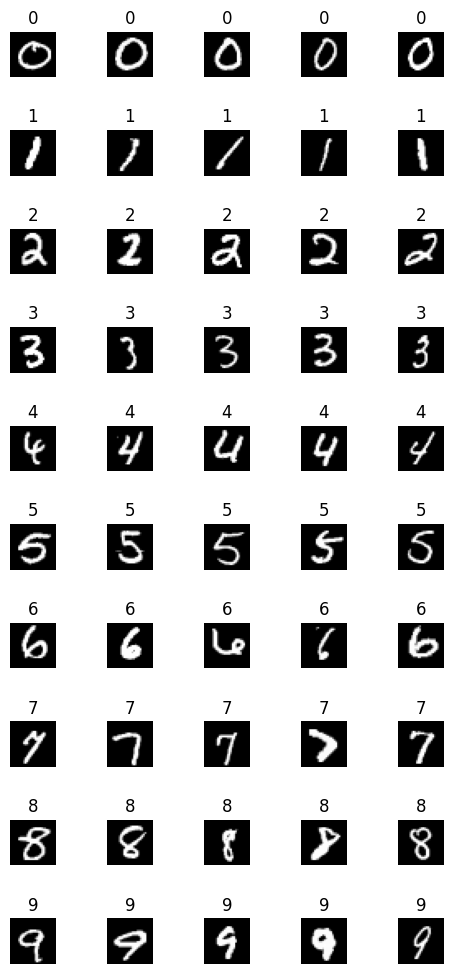

In [ ]:
#Alternative visualization
num_of_samples = [] # list to store the number of samples per class
cols = 5
num_classes = 10
# Create a grid of subplots with a size for each class and the defined number of columns
fig, axs = plt.subplots(nrows = num_classes, ncols= cols, figsize = (5,10))
fig.tight_layout() # for improving the plotting layout
for i in range(cols):
  for j in range(num_classes):# loop through each class
    x_selected = X_train[y_train==j] # Filter out the samples of the current class from the training set

    # Randomly select an image from the filtered samples and display it
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected))],cmap = plt.get_cmap("gray"))

    axs[j][i].axis("off") # to hide the axis for a cleaner visualization

    if i <cols: # Set the title of the subplot to the class label (only for the first column)
      axs[j][i].set_title(str(j))
    if i ==2: # Collect the number of samples for each class (only during the middle column iteration)
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

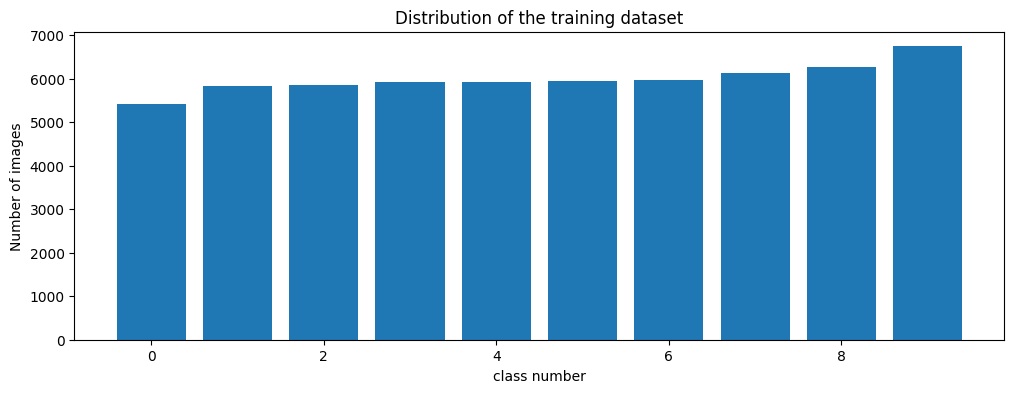

In [ ]:
# Visualizing the distribution of imagaes
print(num_of_samples)
plt.figure(figsize=(12,4))
sorted_num_of_samples = sorted(num_of_samples)
plt.bar(range(0,num_classes),sorted_num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("class number")
plt.ylabel("Number of images")

# One hot encoding and Normalizing

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
X_train = X_train/255
X_test = X_test/255
num_classes=10

# Buliding the training pipeline

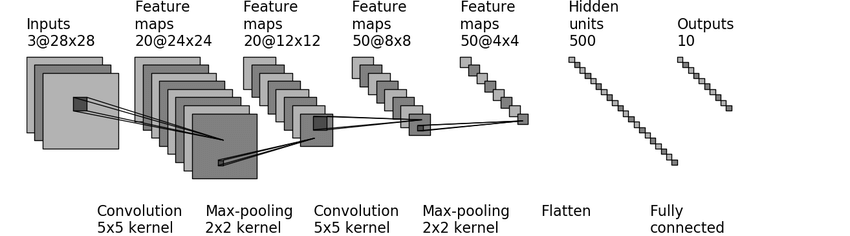




In [ ]:
# here we use similar structure as the lenet
# interested reader can use this link https://en.wikipedia.org/wiki/LeNet
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape = (28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation ='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics = ['accuracy'])
  return model

In [ ]:
model =leNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 15)          11265     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 15)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 240)               0         
                                                                 
 dense_2 (Dense)             (None, 500)              

In [ ]:

# Stop training when the validation loss has not improved for 5 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_split=0.1,
    batch_size=400,
    verbose=1,
    shuffle=1,
    callbacks=[early_stopping]  # Add the callback here
)


Epoch 1/20
135/135 [==============================] - 38s 280ms/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 0.0522 - val_accuracy: 0.9895
Epoch 2/20
135/135 [==============================] - 38s 281ms/step - loss: 0.0196 - accuracy: 0.9943 - val_loss: 0.0568 - val_accuracy: 0.9883
Epoch 3/20
135/135 [==============================] - 39s 289ms/step - loss: 0.0163 - accuracy: 0.9954 - val_loss: 0.0638 - val_accuracy: 0.9880
Epoch 4/20
135/135 [==============================] - 36s 267ms/step - loss: 0.0234 - accuracy: 0.9936 - val_loss: 0.0694 - val_accuracy: 0.9895
Epoch 5/20
135/135 [==============================] - 37s 275ms/step - loss: 0.0286 - accuracy: 0.9926 - val_loss: 0.0569 - val_accuracy: 0.9880
Epoch 6/20
135/135 [==============================] - 38s 278ms/step - loss: 0.0273 - accuracy: 0.9927 - val_loss: 0.0719 - val_accuracy: 0.9853
Epoch 6: early stopping


Text(0.5, 0, 'epoch')

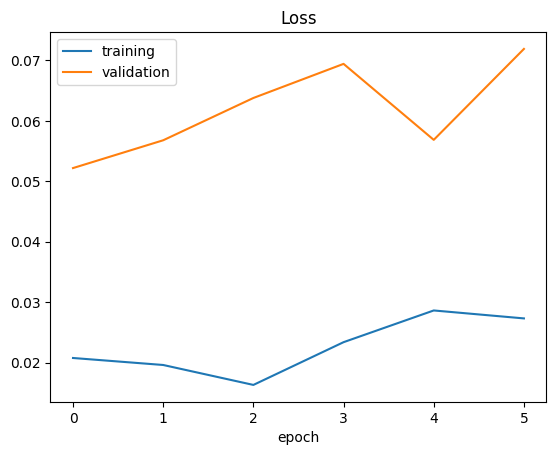

In [ ]:
#plotting the loss funtion
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

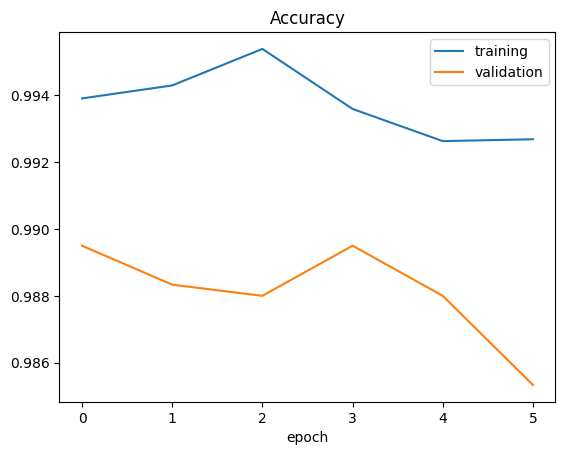

In [ ]:
# plotting the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
from sklearn import metrics
y_pred = model.predict(X_test)
cf_matrix= metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cf_matrix

313/313 [==============================] - 3s 8ms/step


array([[ 972,    0,    1,    1,    0,    0,    4,    2,    0,    0],
       [   1, 1125,    0,    1,    1,    0,    3,    3,    1,    0],
       [   0,    3, 1014,    3,    1,    0,    1,    7,    3,    0],
       [   0,    1,    1,  998,    0,    3,    0,    3,    4,    0],
       [   0,    0,    0,    0,  969,    0,    5,    0,    3,    5],
       [   1,    0,    0,    5,    0,  878,    5,    1,    0,    2],
       [   1,    2,    0,    0,    1,    1,  953,    0,    0,    0],
       [   1,    2,    1,    0,    1,    0,    0, 1022,    0,    1],
       [   1,    0,    1,    0,    0,    2,    4,    2,  962,    2],
       [   0,    0,    0,    0,    9,    1,    0,    5,    4,  990]])

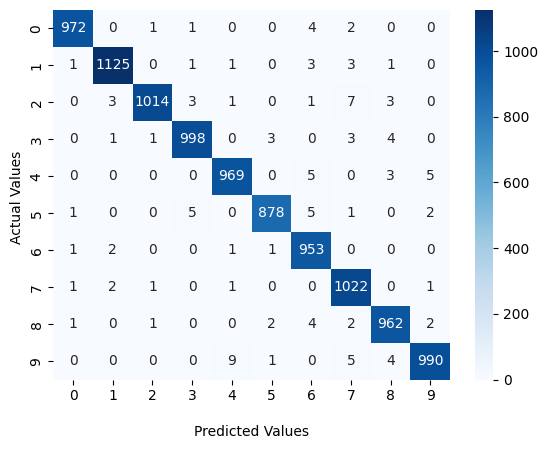

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
#plt.rcParams["figure.figsize"] = (8,5)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Ticket labels - List must be in alphabetical order


## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
model.save('lenet_model.keras')



In [ ]:
#loding the saved model
loaded_lenet = tf.keras.models.load_model('lenet_model.keras')

# Model Testing and Evaluation

In [ ]:
score = loaded_lenet.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06988019496202469
Test accuracy: 0.9839000105857849


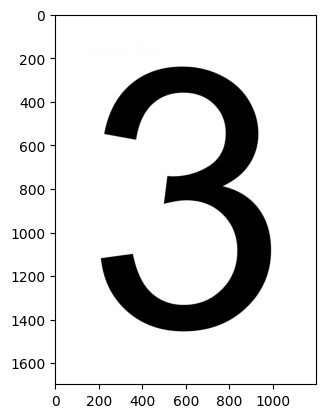

In [ ]:
# Using the trained model to make actual classification
#predict internet number
import requests
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'

r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))



(1, 28, 28, 1)


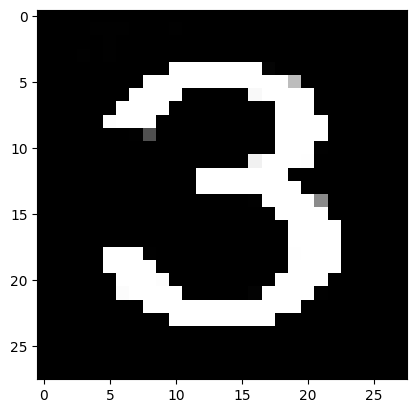

In [ ]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

In [ ]:
predicted_class = np.argmax(loaded_lenet.predict(img,verbose=0 ), axis=-1)
print(predicted_class)

[3]


In [ ]:
layer1 = Model(inputs=loaded_lenet.layers[0].input, outputs=loaded_lenet.layers[0].output)
layer2 = Model(inputs=loaded_lenet.layers[0].input, outputs=loaded_lenet.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

print(visual_layer1.shape)
print(visual_layer2.shape)

1/1 [==============================] - 0s 82ms/step
(1, 24, 24, 30)
(1, 8, 8, 15)


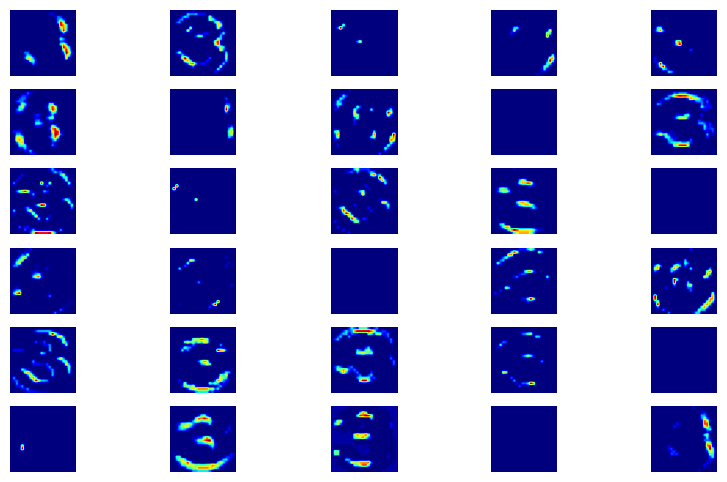

In [ ]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')


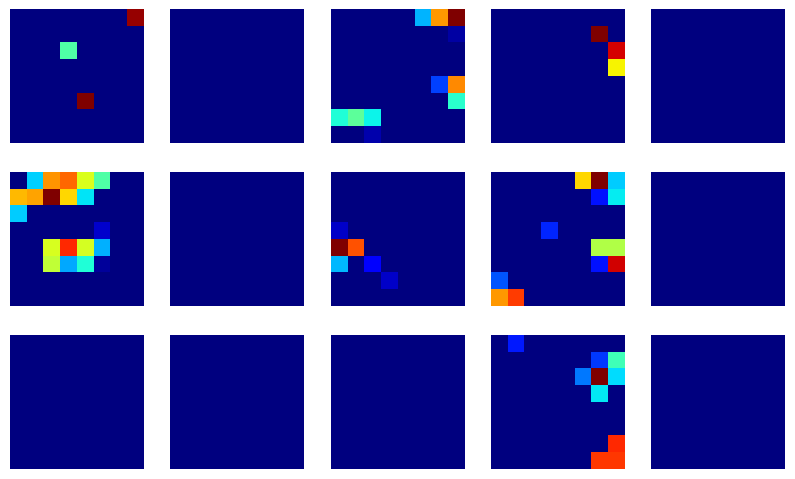

In [ ]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

#CIFAR10 DATASET CLASSIFICATION

In [ ]:
# Alot of the process here should fill thesame  as the previous example
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Model
import random

# Loading , One Hot Encoding and Normalizing Dataset

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [ ]:
print("shape of X_train", X_train.shape)
print("shape of y_train", y_train.shape)
print("shape of X_train", X_test.shape)
print("shape of y_train", y_test.shape)

shape of X_train (50000, 32, 32, 3)
shape of y_train (50000, 1)
shape of X_train (10000, 32, 32, 3)
shape of y_train (10000, 1)


shape of x_train (50000, 32, 32, 3)
shape of y_train (50000, 1)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


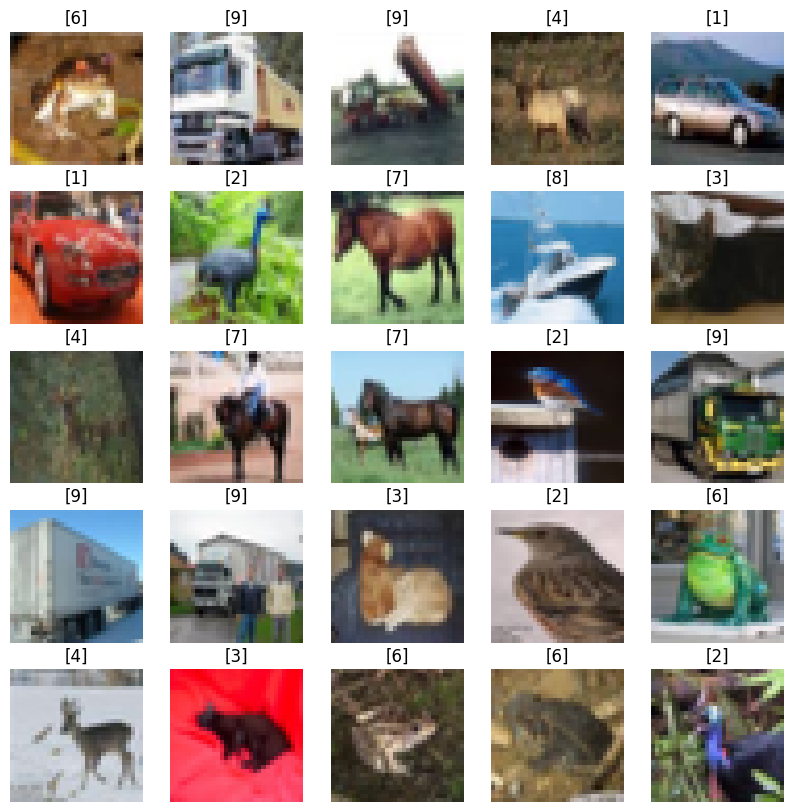

In [ ]:
num_classes = 10
print("shape of x_train", X_train.shape)
print("shape of y_train", y_train.shape)

# Displaying first 9 images of dataset
fig = plt.figure(figsize=(10,10))
nrows=5
ncols=5
for i in range(25):
  fig.add_subplot(nrows,ncols,i+1)
  plt.imshow(X_train[i])
  plt.title(y_train[i])
  plt.axis(False)
plt.show()

In [ ]:
X_train = X_train.reshape(50000,32,32,3)
X_test = X_test.reshape(10000,32,32,3)

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
X_train = X_train/255
X_test = X_test/255
num_classes=10

In [ ]:
#from keras.src.backend import categorical_crossentropy
def leNet_model():
  model = Sequential()
  model.add(Conv2D(64,(5,5),input_shape = (32,32,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(32, (3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation ='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics = ['accuracy'])
  return model

In [ ]:
model =leNet_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 500)              

In [ ]:
history=model.fit(X_train, y_train, epochs=5,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/5
113/113 [==============================] - 87s 758ms/step - loss: 2.2968 - accuracy: 0.1952 - val_loss: 1.9919 - val_accuracy: 0.2804
Epoch 2/5
113/113 [==============================] - 88s 776ms/step - loss: 1.8647 - accuracy: 0.3245 - val_loss: 1.7842 - val_accuracy: 0.3446
Epoch 3/5
113/113 [==============================] - 86s 763ms/step - loss: 1.7495 - accuracy: 0.3680 - val_loss: 1.7364 - val_accuracy: 0.3630
Epoch 4/5
113/113 [==============================] - 86s 762ms/step - loss: 1.7047 - accuracy: 0.3811 - val_loss: 1.7392 - val_accuracy: 0.3688
Epoch 5/5
113/113 [==============================] - 85s 755ms/step - loss: 1.6816 - accuracy: 0.3924 - val_loss: 1.6899 - val_accuracy: 0.3882


Text(0.5, 0, 'epoch')

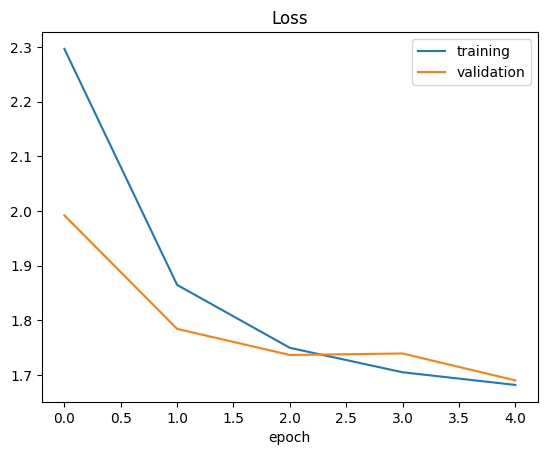

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

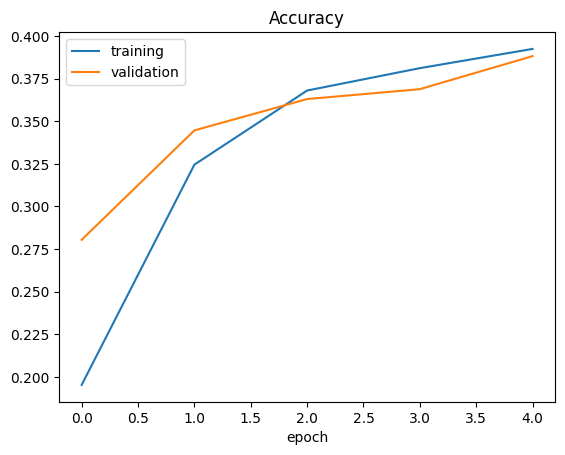

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
from sklearn import metrics
y_pred = model.predict(X_test)
cf_matrix= metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cf_matrix

313/313 [==============================] - 6s 20ms/step


array([[386,  79,  41,  20,  29,  16,  10,  61, 237, 121],
       [ 14, 585,  14,  11,  10,  27,  16,  34,  94, 195],
       [ 58,  31, 232, 100, 114,  83, 153, 125,  40,  64],
       [ 27,  49, 140, 189,  48, 156, 133, 124,  41,  93],
       [ 34,  48, 118,  40, 278,  37, 166, 177,  44,  58],
       [  8,  53, 138, 136,  48, 277,  81, 157,  34,  68],
       [  6,  31,  94,  72, 159,  45, 447,  83,  10,  53],
       [ 17,  42,  62,  38,  55,  73,  44, 540,  19, 110],
       [146, 135,  24,  25,  16,  27,   8,  16, 473, 130],
       [ 22, 215,  22,  18,  13,  26,  18,  66, 114, 486]])

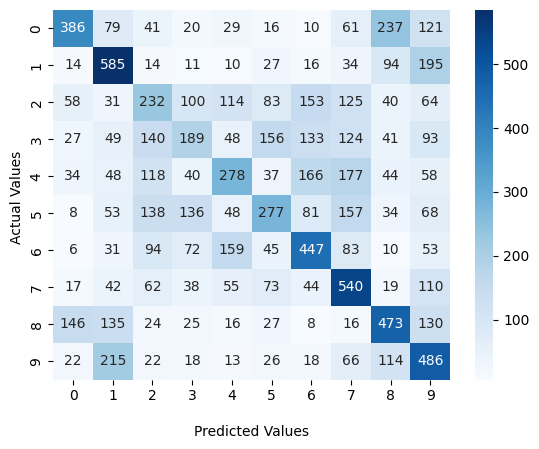

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
#plt.rcParams["figure.figsize"] = (8,5)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Ticket labels - List must be in alphabetical order


## Display the visualization of the Confusion Matrix.
plt.show()

# Optional Excercise Classification of flower Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Model
import random

Found 3670 files belonging to 5 classes.
<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
(64, 180, 180, 3)
(64,)


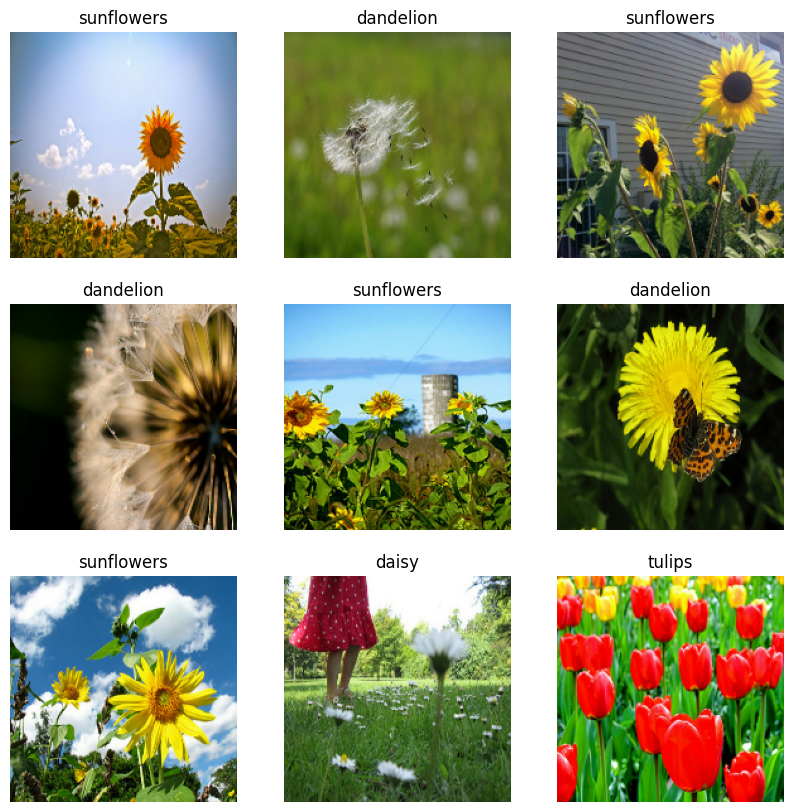

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt


dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(
    origin=dataset_url, fname="flower_photos", untar=True
)

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, image_size=(180, 180), batch_size=64
)
print(type(dataset))

for data, labels in dataset.take(1):
    print(data.shape)
    print(labels.shape)

class_names = dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
train_dataset = dataset.take(80)  # Assuming 80% of data is for training
val_dataset = dataset.skip(80)    # Assuming 20% of data is for validation

In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# 2. Build a Model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=2)

Epoch 1/2
58/58 [==============================] - 132s 2s/step - loss: 1.2702 - accuracy: 0.4499
Epoch 2/2
58/58 [==============================] - 117s 2s/step - loss: 0.9861 - accuracy: 0.6226


Text(0.5, 0, 'epoch')

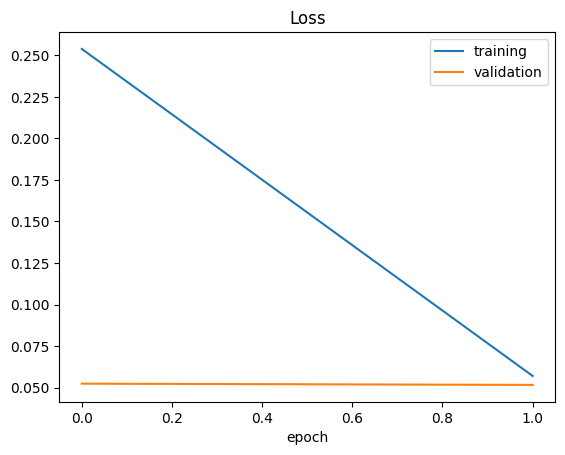

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')